In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import RZGate, RZZGate
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
gamma = 0.5   # Cost unitary parameter
beta  = 0.3   # Mixing unitary parameter
n_qubits = 4  # Four spins / qubits

trotter_steps = 100
T = 10.0  

# Create a QuantumCircuit with 4 qubits and 4 classical bits
qc = QuantumCircuit(n_qubits, n_qubits)

# === STEP 1: Prepare a uniform superposition ===
for i in range(n_qubits):
    qc.h(i)

# Time-dependent interpolation
def s(t):
    return t / T

# Step 2: Trotterized evolution
for step in range(trotter_steps):
    # === STEP 2: Apply the Cost Unitary U_C(gamma) ===
    # H_C = 4 Z0 Z1 + 4 Z0 Z2 + 6 Z0 Z3 + 8 Z1 Z2 + 12 Z1 Z3 + 12 Z2 Z3
    # Implement each ZZ term using Rzz.

    t = (step + 1) * (T / trotter_steps)
    s_t = s(t)
    
    qc.rzz(-2 * s_t * gamma * 4 * (T / trotter_steps), 0, 1)
    qc.rzz(-2 * s_t * gamma * 4 * (T / trotter_steps), 0, 2)
    qc.rzz(-2 * s_t * gamma * 6 * (T / trotter_steps), 0, 3)
    qc.rzz(-2 * s_t * gamma * 8 * (T / trotter_steps), 1, 2)
    qc.rzz(-2 * s_t * gamma * 12 * (T / trotter_steps), 1, 3)
    qc.rzz(-2 * s_t * gamma * 12 * (T / trotter_steps), 2, 3)
    
# === STEP 3: Apply the Mixing Unitary U_M(beta) ===
for i in range(n_qubits):
    qc.rx(2 * beta, i)

# === STEP 4: Measurement ===
qc.measure(range(n_qubits), range(n_qubits))

# Draw the circuit
#qc.draw(output='mpl', style='iqp')


{'0110': 174, '0011': 44, '1011': 67, '1001': 194, '0111': 48, '0100': 70, '0001': 57, '0010': 62, '0101': 35, '1101': 77, '1110': 57, '1000': 53, '1010': 42, '1100': 41, '0000': 3}


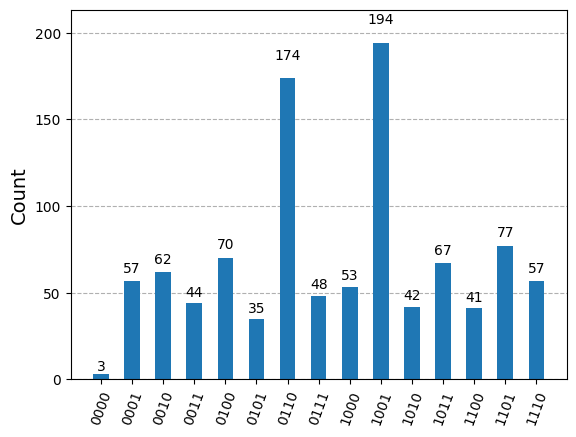

In [4]:
simulator = BasicSimulator()

# Simulate the circuit
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

# Print the counts
print(result.get_counts())

# Plot the histogram
plot_histogram(result.get_counts())